# Plotting the incidences of BW counties

Hier käme noch Text zur Erklärung...

In [6]:
import pandas as pd               # Pandas is a library to analyse various data structures
import numpy as np                # numpy is a library for array manipulation mostly like MatLab
import matplotlib.pyplot as plt   # matplotlib is for plotting

In [7]:
# Here we read the csv-file holding the data.
# Note: the separator is a ; instead of a comma, all NA-values gave to be skipped
#
df_csv = pd.read_csv('Infizierte220111.csv',header=None, sep=';',na_filter=False)
data=df_csv.to_numpy()
nkreise=np.arange(len(data[:,0]))
dict_kreise = dict(zip(data[:,0],nkreise))
#
dfEWZ_csv = pd.read_csv('EWZLandkreise.csv',header=None, sep=';',na_filter=False)
dict_EWZkreise = dict(dfEWZ_csv.to_numpy())

In [8]:
# transform data to float
irange=np.arange(data.shape[0])
jrange=np.arange(1,data.shape[1])
datafloat=np.zeros(data.shape)
dataint=np.zeros(data.shape)
for i in irange: 
    for j in jrange:
        if data[i,j] =='': 
            datafloat[i,j]=0.
        else:
            datafloat[i,j]=float(data[i,j])

<IPython.core.display.Javascript object>


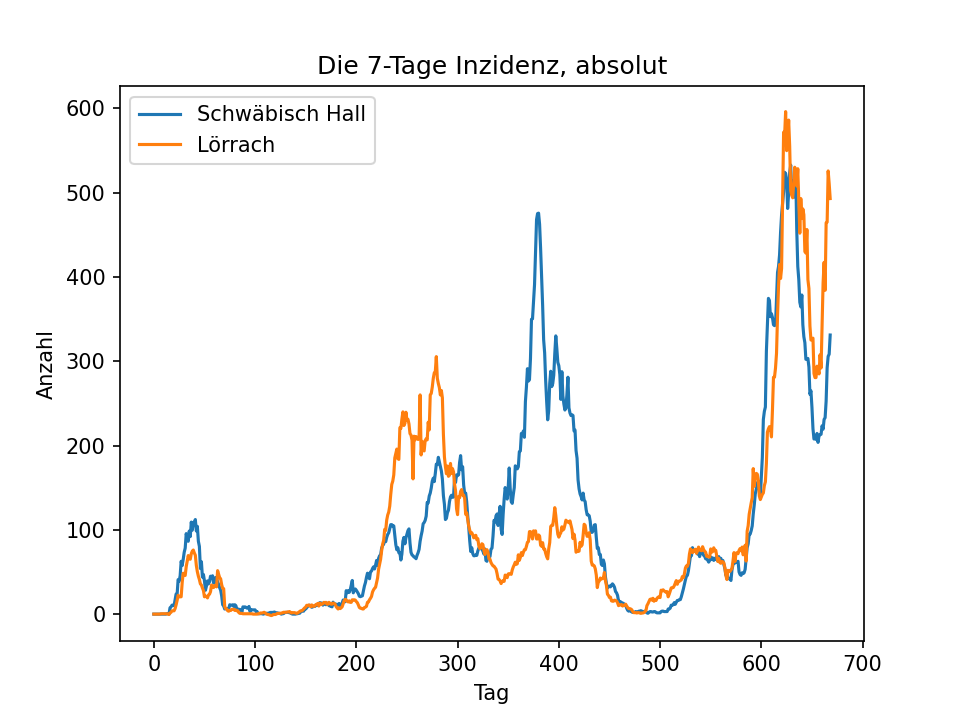

[Text(0, 0.5, 'Anzahl')]

In [9]:
%matplotlib notebook
kreisliste = [ 'Schwäbisch Hall', 'Lörrach']
fig, ax = plt.subplots() # let us plot the data
for kreis in kreisliste:
    factor=1.e5/dict_EWZkreise[kreis]
    #factor = 1.
    y = np.flip(datafloat[dict_kreise[kreis],1:])
    y14 = np.roll(y,7)
    y14[:13] = 0
    delta = y  - y14
    ax.plot(factor*delta[0:], label=kreis)
    #ax.plot(y, label=kreis)
#
ax.legend()
ax.set_title('Die 7-Tage Inzidenz, absolut')
ax.set(xlabel='Tag')
ax.set(ylabel='Anzahl')

In [ ]:
yHall = datafloat[28,1:]
yFrei =datafloat[36,1:]
DeltaHall = (yHall-np.roll(yHall,-7))*1.e5/EWZahl[28]
DeltaFrei = (yFrei-np.roll(yFrei,-7))*1.e5/EWZahl[36]
#plt.plot(np.flip(DeltaHall[:-7]))
#plt.plot(np.flip(DeltaFrei[:-7]))

# Correlation functions

The correlation function for two signals $A(t)$ and $B(t)$ is defined as 
$$
C(t)=\lim_{\tau\rightarrow\infty}\frac{1}{\tau}\int\limits_0^\tau A(t')B(t'-t)dt'$$
Diskrete version in terms of python numpy arrays, the algorithms. Unfortunately the limit $n\rightarrow\infty$ we cannot do. So we keep a finite $n$ as the length of an array. This gives us
$$C[k]=\frac{1}{(n-k)}\sum_{i=0}^{n-k}A[i]\cdot B[i+k]$$
In order to normalize the correlation function we divide by the standard deviations of $A(t)$ and $B(t)$ to read
$$C(k\cdot\Delta\,t)=\frac{1}{(n-k)}\frac{\sum\limits_{i=0}^{n-k}A[i]\cdot B[i+k]}{S_AS_B}$$
where the standard deviations are 
$$S_A=\sqrt{\frac{1}{n-k}\sum_{i=0}^{n-k}A(i\cdot\Delta\,t)^2}$$
and
$$S_B=\sqrt{\frac{1}{n-k}\sum_{i=0}^{n-k}B(i\cdot\Delta\,t+k\cdot\Delta\,t)^2}$$

Note: Please subtract mean of every series $A$ and $B$. See below 

### We calculate the correlation function between A and B. Watch out for the correct n

<IPython.core.display.Javascript object>


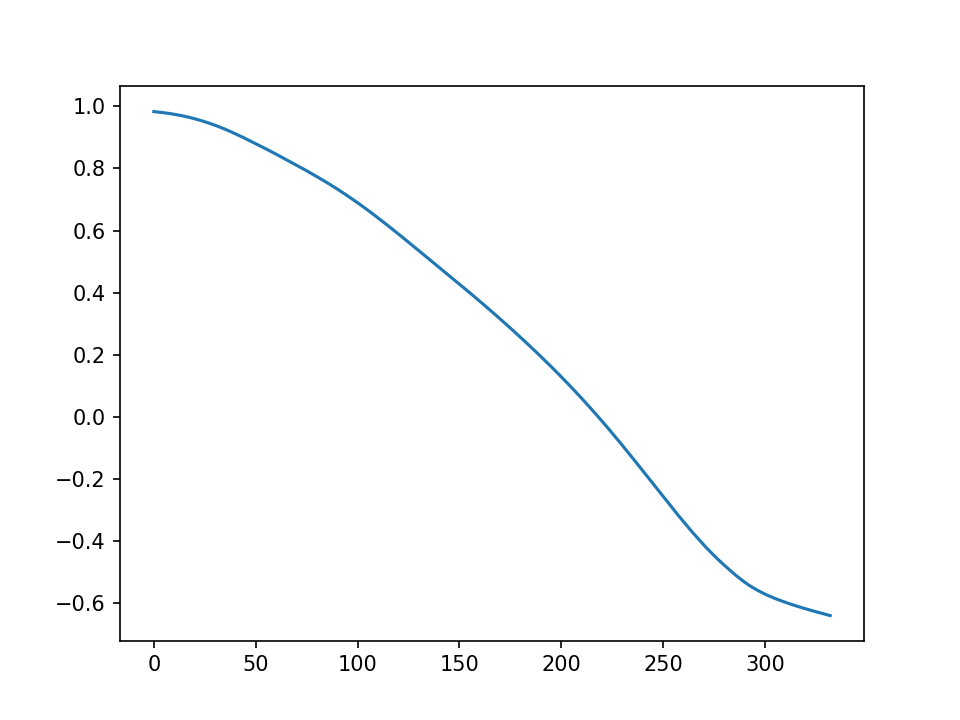

In [10]:
%matplotlib notebook
#
A = datafloat[dict_kreise['Lörrach'],1:] # Choose dataset A
B = datafloat[dict_kreise['Schwäbisch Hall'],1:] # Choose dataset B
A = A - np.mean(A) # subtract mean
B = B - np.mean(B) # subtract mean
lmax = B.shape[0]//2 # Choose the maximum value of k (see formulae above)
C = np.zeros(lmax)
S_A = np.sqrt(np.sum(A[:lmax]*A[:lmax])/lmax) # Standard deviation of A
for k in np.arange(lmax):
    D = np.roll(B, shift = -k)[:lmax] # shift and take the first lmax entries
    S_B = np.sqrt(np.sum(D*D)/lmax) # Standard deviation of B
    C[k] = np.sum(A[:lmax] * D)/lmax/S_A/S_B # The correlation function
# Note that we could just skip the division by lmax because it cancels !!!
plt.plot(C[1:])

### This is an example for the computation of a correlation function

In [ ]:
%matplotlib notebook
# A = B = sin(a t)
n = 2000
a = 1.
t = np.linspace(0,20*np.pi,n)
#A = np.sin(t)
#B = np.cos(t)
A = np.random.rand(n)
B = np.random.rand(n)
A = A - np.mean(A) # Subtract mean
B = B - np.mean(B) # dto.
plt.plot(t, A)
plt.plot(t, B)